<a href="https://colab.research.google.com/github/seydatasdan/yapay-zeka/blob/main/knndiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/yapayzekaveriseti/diabetes.csv") 

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diyabethastasi = data[data.Outcome==1]
saglikli = data[data.Outcome==0]

In [ ]:
# data.shape  

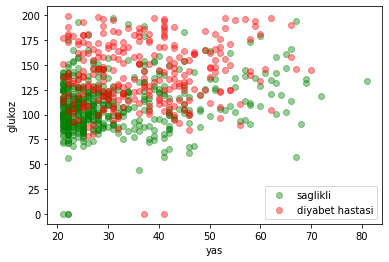

In [ ]:
plt.scatter(saglikli.Age, saglikli.Glucose,color="green",
            label="saglikli",alpha=0.4)
plt.scatter(diyabethastasi.Age, diyabethastasi.Glucose,
            color="red", label="diyabet hastasi",alpha=0.4)
plt.xlabel("yas")
plt.ylabel("glukoz")
plt.legend()
plt.show()

In [ ]:
x1=data.iloc[0:767,0:8]
#print(data)
y1=data.iloc[:-1].values
#print(x1.shape, y1.shape)
print(x1)
print(y1)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3,
                                           random_state=42)
ytrain = ytrain[:, -1]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
print(xtest)
xtrain1=sc.fit_transform(xtrain)

xtest1=sc.transform(xtest)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
667           10      111             70             27        0  27.5   
324            2      112             75             32        0  35.7   
623            0       94             70             27      115  43.5   
689            1      144             82             46      180  46.1   
521            3      124             80             33      130  33.2   
..           ...      ...            ...            ...      ...   ...   
618            9      112             82             24        0  28.2   
198            4      109             64             44       99  34.8   
537            0       57             60              0        0  21.7   
329            6      105             70             32       68  30.8   
302            5       77             82             41       42  35.8   

     DiabetesPedigreeFunction  Age  
667                     0.141   40  
324                     0.148   21  


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(17)

In [ ]:
knn.fit(xtrain1,ytrain)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
yhead=knn.predict(xtest1)

In [ ]:
knn.score(xtest1,ytest[:, -1])

0.7575757575757576

In [ ]:
scorelite=[]
for i in range(1,30):
  knn2=KNeighborsClassifier(n_neighbors=i)
  knn2.fit(xtrain1,ytrain)
  scorelite.append(knn2.score(xtest1,ytest[:, -1]))

<function matplotlib.pyplot.show(*args, **kw)>

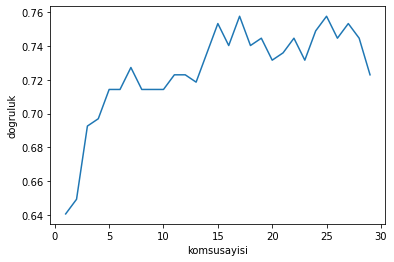

In [ ]:
plt.plot(range(1,30),scorelite)
plt.xlabel("komsusayisi")
plt.ylabel("dogruluk")
plt.show

In [ ]:
#confusion matris

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest[:, -1],yhead)
print(cm)

[[129  20]
 [ 36  46]]
